In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units

In [14]:
theta =  np.arange(0.01, 3*np.pi, np.pi/100)
#print(theta)
gamma = 1
gamma_2 = 2
gamma_5 = 5
gamma_10 = 10
A = 1
c = const.c
v_1 = np.sqrt(c**2 - (c/gamma)**2)
v_2 = np.sqrt(c**2 - (c/gamma_2)**2)
v_5 = np.sqrt(c**2 - (c/gamma_5)**2)
v_10 = np.sqrt(c**2 - (c/gamma_10)**2)

In [11]:
parallel = A*(np.sin(theta))**2/(1-(v_1/c)*np.cos(theta))**6
parallel_2 = A*(np.sin(theta))**2/(1-(v_2/c)*np.cos(theta))**6
parallel_5 = A*(np.sin(theta))**2/(1-(v_5/c)*np.cos(theta))**6
parallel_10 = A*(np.sin(theta))**2/(1-(v_10/c)*np.cos(theta))**6

perpendicular = (1/(1-(v_1/c)*np.cos(theta))**4)*(1- (np.sin(theta)**2)/(gamma**2 * (1-(v_1/c)*np.cos(theta))**2))
perpendicular_2 = (1/(1-(v_2/c)*np.cos(theta))**4)*(1- (np.sin(theta)**2)/(gamma_2**2 * (1-(v_2/c)*np.cos(theta))**2))
perpendicular_5 = (1/(1-(v_5/c)*np.cos(theta))**4)*(1- (np.sin(theta)**2)/(gamma_5**2 * (1-(v_5/c)*np.cos(theta))**2))
perpendicular_10 = (1/(1-(v_10/c)*np.cos(theta))**4)*(1- (np.sin(theta)**2)/(gamma_10**2 * (1-(v_10/c)*np.cos(theta))**2))

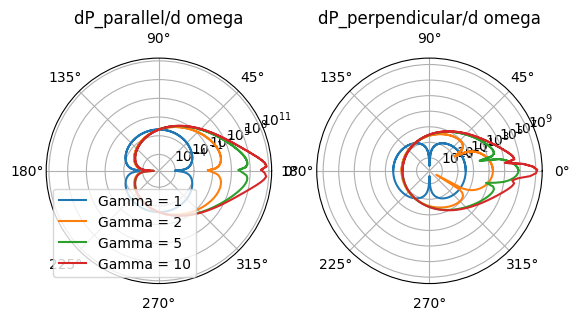

In [27]:
fig, ax = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
ax[0].plot(theta, parallel, label = 'Gamma = 1')
ax[0].plot(theta, parallel_2, label = 'Gamma = 2')
ax[0].plot(theta, parallel_5, label = 'Gamma = 5')
ax[0].plot(theta, parallel_10, label = 'Gamma = 10')
ax[0].set_yscale('log')
ax[0].set_title('dP_parallel/d omega')
ax[0].legend(loc='best')

ax[1].plot(theta, perpendicular, label = 'Gamma = 1')
ax[1].plot(theta, perpendicular_2, label = 'Gamma = 2')
ax[1].plot(theta, perpendicular_5, label = 'Gamma = 5')
ax[1].plot(theta, perpendicular_10, label = 'Gamma = 10')
ax[1].set_yscale('log')
ax[1].set_title('dP_perpendicular/d omega')
#ax[1].legend()

fig.savefig('/Users/reagen/Documents/UCSD/Classes/Astro201/HWs/hw4_problem3.pdf', format='pdf')

## Extra Credit

In [2]:
## Manually changing gamma in this cell for the extra credit
theta =  np.arange(0.01, 3*np.pi, np.pi/60)
phi = np.arange(0.01, 3*np.pi, np.pi/60)
#print(theta)
gamma = 2
#gamma_2 = 2
#gamma_5 = 5
#gamma_10 = 10
c = const.c
A = A=(const.e.esu**2/(4*np.pi*const.c.cgs)).value

v_1 = np.sqrt(c**2 - (c/gamma)**2)
#v_2 = np.sqrt(c**2 - (c/gamma_2)**2)
#v_5 = np.sqrt(c**2 - (c/gamma_5)**2)
#v_10 = np.sqrt(c**2 - (c/gamma_10)**2)

#parallel_2 = A*(np.sin(theta))**2/(1-(v_2/c)*np.cos(theta))**6
#parallel_5 = A*(np.sin(theta))**2/(1-(v_5/c)*np.cos(theta))**6
#parallel_10 = A*(np.sin(theta))**2/(1-(v_10/c)*np.cos(theta))**6
#perpendicular_2 = (1/(1-(v_2/c)*np.cos(theta))**4)*(1- (np.sin(theta)**2)/(gamma_2**2 * (1-(v_2/c)*np.cos(theta))**2))
#perpendicular_5 = (1/(1-(v_5/c)*np.cos(theta))**4)*(1- (np.sin(theta)**2)/(gamma_5**2 * (1-(v_5/c)*np.cos(theta))**2))
#perpendicular_10 = (1/(1-(v_10/c)*np.cos(theta))**4)*(1- (np.sin(theta)**2)/(gamma_10**2 * (1-(v_10/c)*np.cos(theta))**2))


In [3]:
para_x = np.zeros((len(theta),len(phi)))
para_y = np.zeros((len(theta),len(phi)))
para_z = np.zeros((len(theta),len(phi)))

perp_x = np.zeros((len(theta),len(phi)))
perp_y = np.zeros((len(theta),len(phi)))
perp_z = np.zeros((len(theta),len(phi)))

parallel = np.zeros((len(theta),len(phi)))
perpendicular = np.zeros((len(theta),len(phi)))
for ii in range(len(theta)): 
    for jj in range(len(phi)): 

        parallel_specific = A*(np.sin(theta[ii]))**2/(1-(v_1/c)*np.cos(theta[ii]))**6
        parallel[ii,jj] = parallel_specific
        para_x[ii,jj] = parallel_specific*np.sin(theta[ii])*np.cos(phi[jj])
        para_y[ii,jj] = parallel_specific*np.sin(theta[ii])*np.sin(phi[jj])
        para_z[ii,jj] = parallel_specific*np.cos(theta[ii])
        
        
        perpendicular_specific = (1/(1-(v_1/c)*np.cos(theta[ii]))**4)*(1- (np.sin(theta[ii])**2*np.cos(phi[jj])**2)/(gamma**2 * (1-(v_1/c)*np.cos(theta[ii]))**2))
        perp_x[ii,jj] = perpendicular_specific*np.sin(theta[ii])*np.cos(phi[jj])
        perp_y[ii,jj] = perpendicular_specific*np.sin(theta[ii])*np.sin(phi[jj])
        perp_z[ii,jj] = perpendicular_specific*np.cos(theta[ii])


Text(0.5, 0.92, 'Parallel, Gamma = 2')

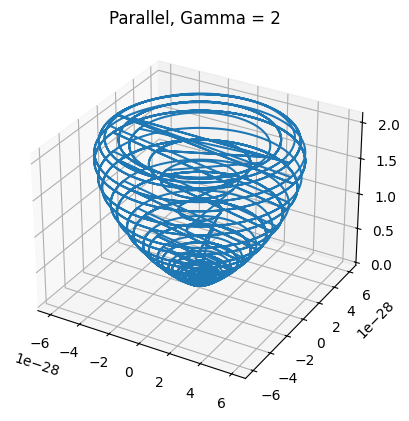

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot(parallel,theta,phi)
ax.plot(para_x,para_y,para_z)
ax.set_title('Parallel, Gamma = 2')

Text(0.5, 0.92, 'Perpendicular, Gamma = 2')

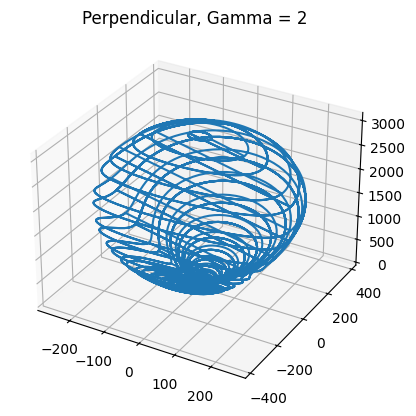

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot(parallel,theta,phi)
ax.plot(perp_x,perp_y,perp_z)
ax.set_title('Perpendicular, Gamma = 2')